NBA ERA Explained (All Detail coming from a Reddit Post)
- 1956-1967: Russell Era
- 1968-1979: ABA Expansion
- 1980-1992: Magic and Bird Era
- 1993-2003: Jordan to 2003s
- 2004-2013: Modern Era
- 2014-Present: 3-Point Curry Era

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
df_awards = pd.read_csv('Dataset/Player Award Shares.csv')
pd.set_option('display.max_columns', None)
df_awards

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,seas_id,player_id
0,2024,clutch_poy,Stephen Curry,35,GSW,45.0,298.0,495.0,0.602,True,31786,3903
1,2024,clutch_poy,DeMar DeRozan,34,CHI,34.0,272.0,495.0,0.549,False,31296,3872
2,2024,clutch_poy,Shai Gilgeous-Alexander,25,OKC,11.0,160.0,495.0,0.323,False,31769,4670
3,2024,clutch_poy,Nikola Jokić,28,DEN,4.0,85.0,495.0,0.172,False,31672,4352
4,2024,clutch_poy,Jalen Brunson,27,NYK,2.0,26.0,495.0,0.053,False,31429,4630
...,...,...,...,...,...,...,...,...,...,...,...,...
3371,1956,nba mvp,Mel Hutchins,27,FTW,9.0,9.0,80.0,0.113,False,1732,466
3372,1956,nba mvp,Dolph Schayes,27,SYR,2.0,2.0,80.0,0.025,False,1687,328
3373,1956,nba mvp,Bill Sharman,29,BOS,2.0,2.0,80.0,0.025,False,1652,419
3374,1956,nba mvp,Tom Gola,23,PHW,1.0,1.0,80.0,0.013,False,1748,607


In [276]:
df_awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   season     3376 non-null   int64  
 1   award      3376 non-null   object 
 2   player     3376 non-null   object 
 3   age        3376 non-null   int64  
 4   tm         3376 non-null   object 
 5   first      3359 non-null   float64
 6   pts_won    3375 non-null   float64
 7   pts_max    3375 non-null   float64
 8   share      3375 non-null   float64
 9   winner     3375 non-null   object 
 10  seas_id    3376 non-null   int64  
 11  player_id  3376 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 316.6+ KB


In [277]:
df_awards[(df_awards['winner'].isnull()) == True]

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,seas_id,player_id
2818,1983,smoy,Bobby Jones,31,PHI,NaN,NaN,NaN,NaN,NaN,9119,1559


In [317]:
df_awards.loc[(df_awards['player'] == 'Bobby Jones') & (df_awards['season'] == 1983) & (df_awards['award'] == 'smoy'), 'winner'] = True

In [279]:
df_awards[(df_awards['winner'].isnull()) == True]

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,seas_id,player_id


In [280]:
df_awards.describe()

,season,age,first,pts_won,pts_max,share,seas_id,player_id
count,3376.000000,3376.000000,3359.00000,3375.000000,3375.000000,3375.000000,3376.000000,3376.000000
mean,2000.044431,26.150770,8.18696,72.827822,560.761481,0.128121,17888.002962,2921.282287
std,16.565107,3.836212,20.33892,168.607120,343.718835,0.227177,7986.536447,1104.782927
min,1956.000000,19.000000,0.00000,0.100000,17.000000,0.001000,1652.000000,248.000000
25%,1989.000000,23.000000,0.00000,2.000000,176.000000,0.006000,11647.000000,2176.000000
50%,2004.000000,26.000000,1.00000,7.000000,600.000000,0.020000,19036.000000,3096.000000
75%,2013.000000,29.000000,4.00000,45.000000,690.000000,0.128000,24193.250000,3783.000000
max,2024.000000,40.000000,159.00000,1310.000000,1310.000000,1.000000,31850.000000,5209.000000


In [281]:
df_mvp = df_awards[df_awards['award'] == 'nba mvp'].copy()
pd.unique(df_mvp['award'])

array(['nba mvp'], dtype=object)

In [282]:
df_mvp_top_3 = df_mvp.groupby('season').head(3)
df_mvp_top_3

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,seas_id,player_id
42,2024,nba mvp,Nikola Jokić,28,DEN,79.0,926.0,990.0,0.935,True,31672,4352
43,2024,nba mvp,Shai Gilgeous-Alexander,25,OKC,15.0,640.0,990.0,0.646,False,31769,4670
44,2024,nba mvp,Luka Dončić,24,DAL,4.0,566.0,990.0,0.572,False,31593,4654
108,2023,nba mvp,Joel Embiid,28,PHI,73.0,915.0,1000.0,0.915,True,30764,4417
109,2023,nba mvp,Nikola Jokić,27,DEN,15.0,674.0,1000.0,0.674,False,30964,4352
...,...,...,...,...,...,...,...,...,...,...,...,...
3357,1957,nba mvp,Bob Pettit,24,STL,21.0,21.0,80.0,0.263,False,1772,549
3358,1957,nba mvp,Paul Arizin,28,PHW,9.0,9.0,80.0,0.113,False,1841,445
3368,1956,nba mvp,Bob Pettit,23,STL,33.0,33.0,80.0,0.413,True,1658,549
3369,1956,nba mvp,Paul Arizin,27,PHW,21.0,21.0,80.0,0.263,False,1737,445


In [283]:
df_player_seasons = pd.read_csv('Dataset/Player Per Game.csv')
df_player_seasons = df_player_seasons.drop(columns=['lg', 'birth_year', 'seas_id'])
# Player_id keep in case same name players
df_player_seasons

,season,player_id,player,pos,age,experience,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2025,5025.0,A.J. Green,SG,25.0,3.0,MIL,66,6.0,22.7,2.5,5.9,0.423,2.1,5.0,0.414,0.4,0.8,0.473,0.601,0.3,0.4,0.833,0.2,2.0,2.3,1.5,0.5,0.1,0.6,2.2,7.4
1,2025,5026.0,A.J. Lawson,SG,24.0,3.0,TOR,19,2.0,17.3,2.7,7.1,0.381,1.3,4.0,0.316,1.4,3.1,0.466,0.470,1.2,1.8,0.647,0.7,2.3,3.0,0.8,0.3,0.2,0.4,1.5,7.8
2,2025,5210.0,AJ Johnson,SG,20.0,1.0,TOT,22,5.0,18.0,2.4,5.8,0.406,0.7,2.5,0.291,1.6,3.3,0.493,0.469,1.0,1.1,0.840,0.3,1.7,2.0,2.4,0.4,0.1,1.0,0.9,6.4
3,2025,5210.0,AJ Johnson,SG,20.0,1.0,MIL,7,0.0,6.3,1.1,2.7,0.421,0.4,0.7,0.600,0.7,2.0,0.357,0.500,0.1,0.3,0.500,0.0,1.0,1.0,1.0,0.1,0.0,0.6,0.0,2.9
4,2025,5210.0,AJ Johnson,SG,20.0,1.0,WAS,15,5.0,23.5,2.9,7.3,0.404,0.9,3.3,0.260,2.1,3.9,0.525,0.463,1.3,1.5,0.870,0.5,2.0,2.5,3.0,0.5,0.1,1.3,1.3,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32584,1947,157.0,Walt Miller,F,31.0,1.0,PIT,12,NaN,NaN,0.6,1.8,0.333,NaN,NaN,NaN,0.6,1.8,0.333,0.333,0.8,1.5,0.500,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.3,1.9
32585,1947,158.0,Warren Fenley,F,24.0,1.0,BOS,33,NaN,NaN,0.9,4.2,0.225,NaN,NaN,NaN,0.9,4.2,0.225,0.225,0.7,1.4,0.511,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.8,2.6
32586,1947,159.0,Wilbert Kautz,G-F,31.0,1.0,CHS,50,NaN,NaN,2.1,8.4,0.255,NaN,NaN,NaN,2.1,8.4,0.255,0.255,0.8,1.5,0.534,NaN,NaN,NaN,0.7,NaN,NaN,NaN,2.3,5.1
32587,1947,160.0,Woody Grimshaw,G,27.0,1.0,PRO,21,NaN,NaN,1.0,2.7,0.357,NaN,NaN,NaN,1.0,2.7,0.357,0.357,1.0,2.1,0.477,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.2,2.9


In [284]:
df_merged_mvp = df_mvp_top_3.merge(df_player_seasons, how='left', on=['player', 'season'], suffixes=(' ', '_y'))
df_merged_mvp.drop(df_merged_mvp.filter(regex='_y$').columns, axis=1, inplace=True)
df_merged_mvp.columns = df_merged_mvp.columns.str.strip() # Need to clean this up because although age looked like 'age', there are hidden spaces
df_merged_mvp

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,seas_id,player_id,pos,experience,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2024,nba mvp,Nikola Jokić,28,DEN,79.0,926.0,990.0,0.935,True,31672,4352,C,9.0,79,79.0,34.6,10.4,17.9,0.583,1.1,2.9,0.359,9.4,14.9,0.626,0.612,4.5,5.5,0.817,2.8,9.5,12.4,9.0,1.4,0.9,3.0,2.5,26.4
1,2024,nba mvp,Shai Gilgeous-Alexander,25,OKC,15.0,640.0,990.0,0.646,False,31769,4670,PG,6.0,75,75.0,34.0,10.6,19.8,0.535,1.3,3.6,0.353,9.3,16.2,0.576,0.567,7.6,8.7,0.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1
2,2024,nba mvp,Luka Dončić,24,DAL,4.0,566.0,990.0,0.572,False,31593,4654,PG,6.0,70,70.0,37.5,11.5,23.6,0.487,4.1,10.6,0.382,7.4,13.0,0.573,0.573,6.8,8.7,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9
3,2023,nba mvp,Joel Embiid,28,PHI,73.0,915.0,1000.0,0.915,True,30764,4417,C,7.0,66,66.0,34.6,11.0,20.1,0.548,1.0,3.0,0.330,10.0,17.1,0.587,0.573,10.0,11.7,0.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1
4,2023,nba mvp,Nikola Jokić,27,DEN,15.0,674.0,1000.0,0.674,False,30964,4352,C,8.0,69,69.0,33.7,9.4,14.8,0.632,0.8,2.2,0.383,8.5,12.7,0.675,0.660,4.9,6.0,0.822,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1957,nba mvp,Bob Pettit,24,STL,21.0,21.0,80.0,0.263,False,1772,549,C,3.0,71,NaN,35.1,8.6,20.8,0.415,NaN,NaN,NaN,8.6,20.8,0.415,0.415,7.5,9.6,0.773,NaN,NaN,14.6,1.9,NaN,NaN,NaN,2.5,24.7
203,1957,nba mvp,Paul Arizin,28,PHW,9.0,9.0,80.0,0.113,False,1841,445,SF,5.0,71,NaN,39.0,8.6,20.4,0.422,NaN,NaN,NaN,8.6,20.4,0.422,0.422,8.3,10.0,0.829,NaN,NaN,7.9,2.1,NaN,NaN,NaN,3.9,25.6
204,1956,nba mvp,Bob Pettit,23,STL,33.0,33.0,80.0,0.413,True,1658,549,C,2.0,72,NaN,38.8,9.0,20.9,0.429,NaN,NaN,NaN,9.0,20.9,0.429,0.429,7.7,10.5,0.736,NaN,NaN,16.2,2.6,NaN,NaN,NaN,2.8,25.7
205,1956,nba mvp,Paul Arizin,27,PHW,21.0,21.0,80.0,0.263,False,1737,445,SF,4.0,72,NaN,37.8,8.6,19.1,0.448,NaN,NaN,NaN,8.6,19.1,0.448,0.448,7.0,8.7,0.810,NaN,NaN,7.5,2.6,NaN,NaN,NaN,3.9,24.2


In [293]:
era_bins = [1956, 1968, 1980, 1993, 2004, 2014, 2025]
era_labels = ['1956-1967', '1968-1979', '1980-1992', '1993-2003', '2004-2013', '2014-Present']
df_merged_mvp['Era'] = pd.cut(df_merged_mvp['season'], bins=era_bins, labels=era_labels, right=False)
df_merged_mvp

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,seas_id,player_id,pos,experience,g,gs,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,Era
0,2024,nba mvp,Nikola Jokić,28,DEN,79.0,926.0,990.0,0.935,True,31672,4352,C,9.0,79,79.0,34.6,10.4,17.9,0.583,1.1,2.9,0.359,9.4,14.9,0.626,0.612,4.5,5.5,0.817,2.8,9.5,12.4,9.0,1.4,0.9,3.0,2.5,26.4,2014-Present
1,2024,nba mvp,Shai Gilgeous-Alexander,25,OKC,15.0,640.0,990.0,0.646,False,31769,4670,PG,6.0,75,75.0,34.0,10.6,19.8,0.535,1.3,3.6,0.353,9.3,16.2,0.576,0.567,7.6,8.7,0.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,2014-Present
2,2024,nba mvp,Luka Dončić,24,DAL,4.0,566.0,990.0,0.572,False,31593,4654,PG,6.0,70,70.0,37.5,11.5,23.6,0.487,4.1,10.6,0.382,7.4,13.0,0.573,0.573,6.8,8.7,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,2014-Present
3,2023,nba mvp,Joel Embiid,28,PHI,73.0,915.0,1000.0,0.915,True,30764,4417,C,7.0,66,66.0,34.6,11.0,20.1,0.548,1.0,3.0,0.330,10.0,17.1,0.587,0.573,10.0,11.7,0.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,2014-Present
4,2023,nba mvp,Nikola Jokić,27,DEN,15.0,674.0,1000.0,0.674,False,30964,4352,C,8.0,69,69.0,33.7,9.4,14.8,0.632,0.8,2.2,0.383,8.5,12.7,0.675,0.660,4.9,6.0,0.822,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,2014-Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1957,nba mvp,Bob Pettit,24,STL,21.0,21.0,80.0,0.263,False,1772,549,C,3.0,71,NaN,35.1,8.6,20.8,0.415,NaN,NaN,NaN,8.6,20.8,0.415,0.415,7.5,9.6,0.773,NaN,NaN,14.6,1.9,NaN,NaN,NaN,2.5,24.7,1956-1967
203,1957,nba mvp,Paul Arizin,28,PHW,9.0,9.0,80.0,0.113,False,1841,445,SF,5.0,71,NaN,39.0,8.6,20.4,0.422,NaN,NaN,NaN,8.6,20.4,0.422,0.422,8.3,10.0,0.829,NaN,NaN,7.9,2.1,NaN,NaN,NaN,3.9,25.6,1956-1967
204,1956,nba mvp,Bob Pettit,23,STL,33.0,33.0,80.0,0.413,True,1658,549,C,2.0,72,NaN,38.8,9.0,20.9,0.429,NaN,NaN,NaN,9.0,20.9,0.429,0.429,7.7,10.5,0.736,NaN,NaN,16.2,2.6,NaN,NaN,NaN,2.8,25.7,1956-1967
205,1956,nba mvp,Paul Arizin,27,PHW,21.0,21.0,80.0,0.263,False,1737,445,SF,4.0,72,NaN,37.8,8.6,19.1,0.448,NaN,NaN,NaN,8.6,19.1,0.448,0.448,7.0,8.7,0.810,NaN,NaN,7.5,2.6,NaN,NaN,NaN,3.9,24.2,1956-1967


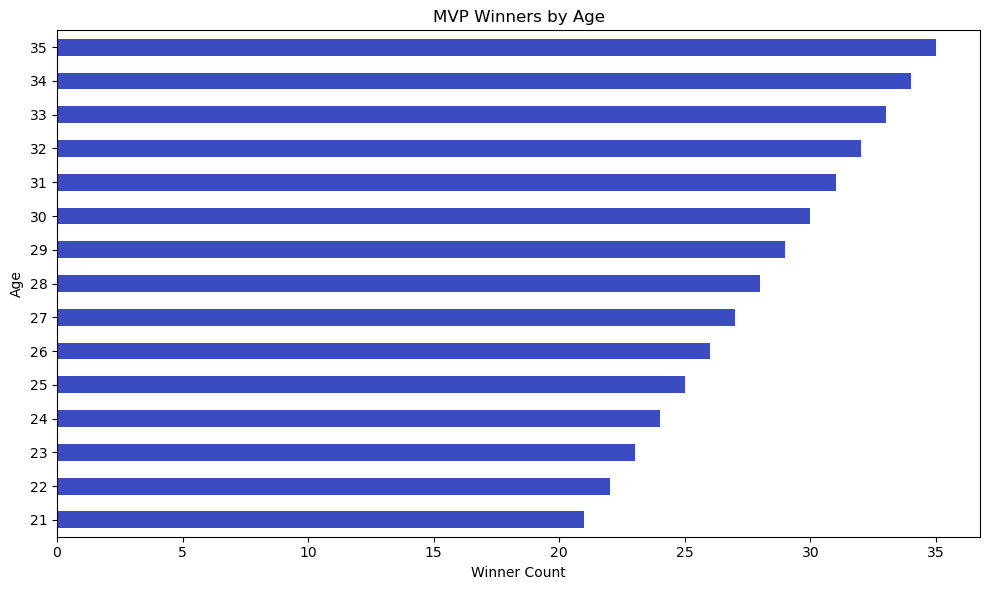

In [297]:
df_mvp_age = df_merged_mvp.copy().groupby('age')
plt.figure(figsize=(10,6))
df_mvp_age['age'].median().plot(kind='barh', colormap='coolwarm')
plt.title('MVP Winners by Age') # Top 3 Right Now
plt.ylabel('Age')
plt.xlabel('Winner Count')
plt.tight_layout()
plt.show()


In [286]:
# Heatmap based on Stats and Winners

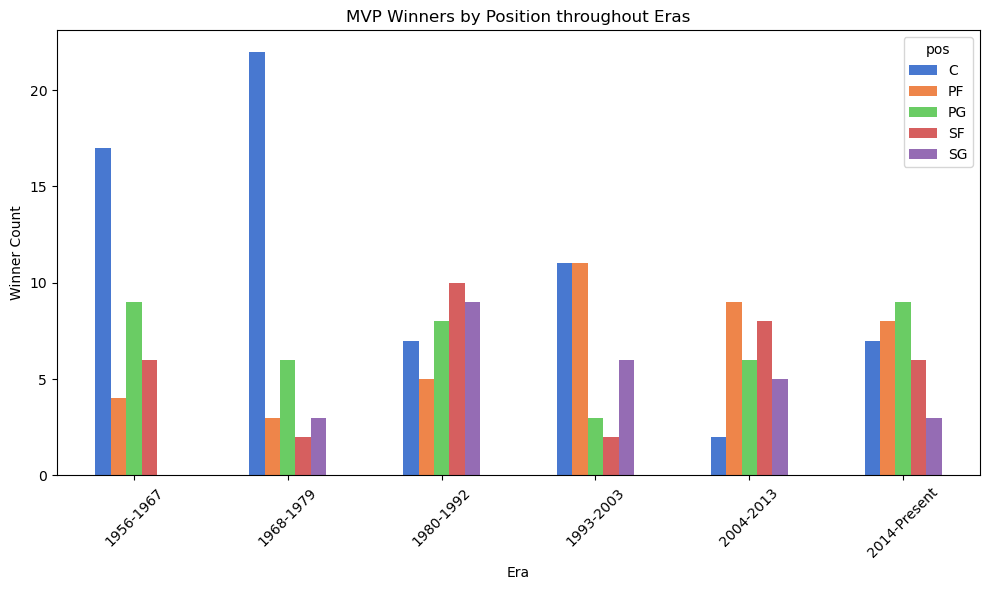

In [298]:
# Position Winner Changes throughout the years, Im thinking a column chart with line chart
sns.set_palette('muted')
df_winner_positions = pd.pivot_table(df_merged_mvp, index='Era', columns='pos', values='player' ,aggfunc='count', observed=False) # Index x, Columns filter, values is why
fig, ax = plt.subplots(figsize=(10, 6))
df_winner_positions.plot(kind='bar', ax=ax)
plt.title('MVP Winners by Position throughout Eras')
ax.tick_params("x", rotation=45)
plt.xlabel('Era')
plt.ylabel("Winner Count")
plt.tight_layout()
plt.show()

In [340]:
df_stats_corr = df_merged_mvp.copy()
df_stats_corr = df_stats_corr.drop(columns=['season', 'award', 'player', 'tm', 'first', 'pts_won', 'pts_max', 'share', 'winner', 'seas_id', 'player_id', 'gs', 'pos', 'Era', 'g', 'age', 'experience'])
cor_matrix = df_stats_corr.corr()

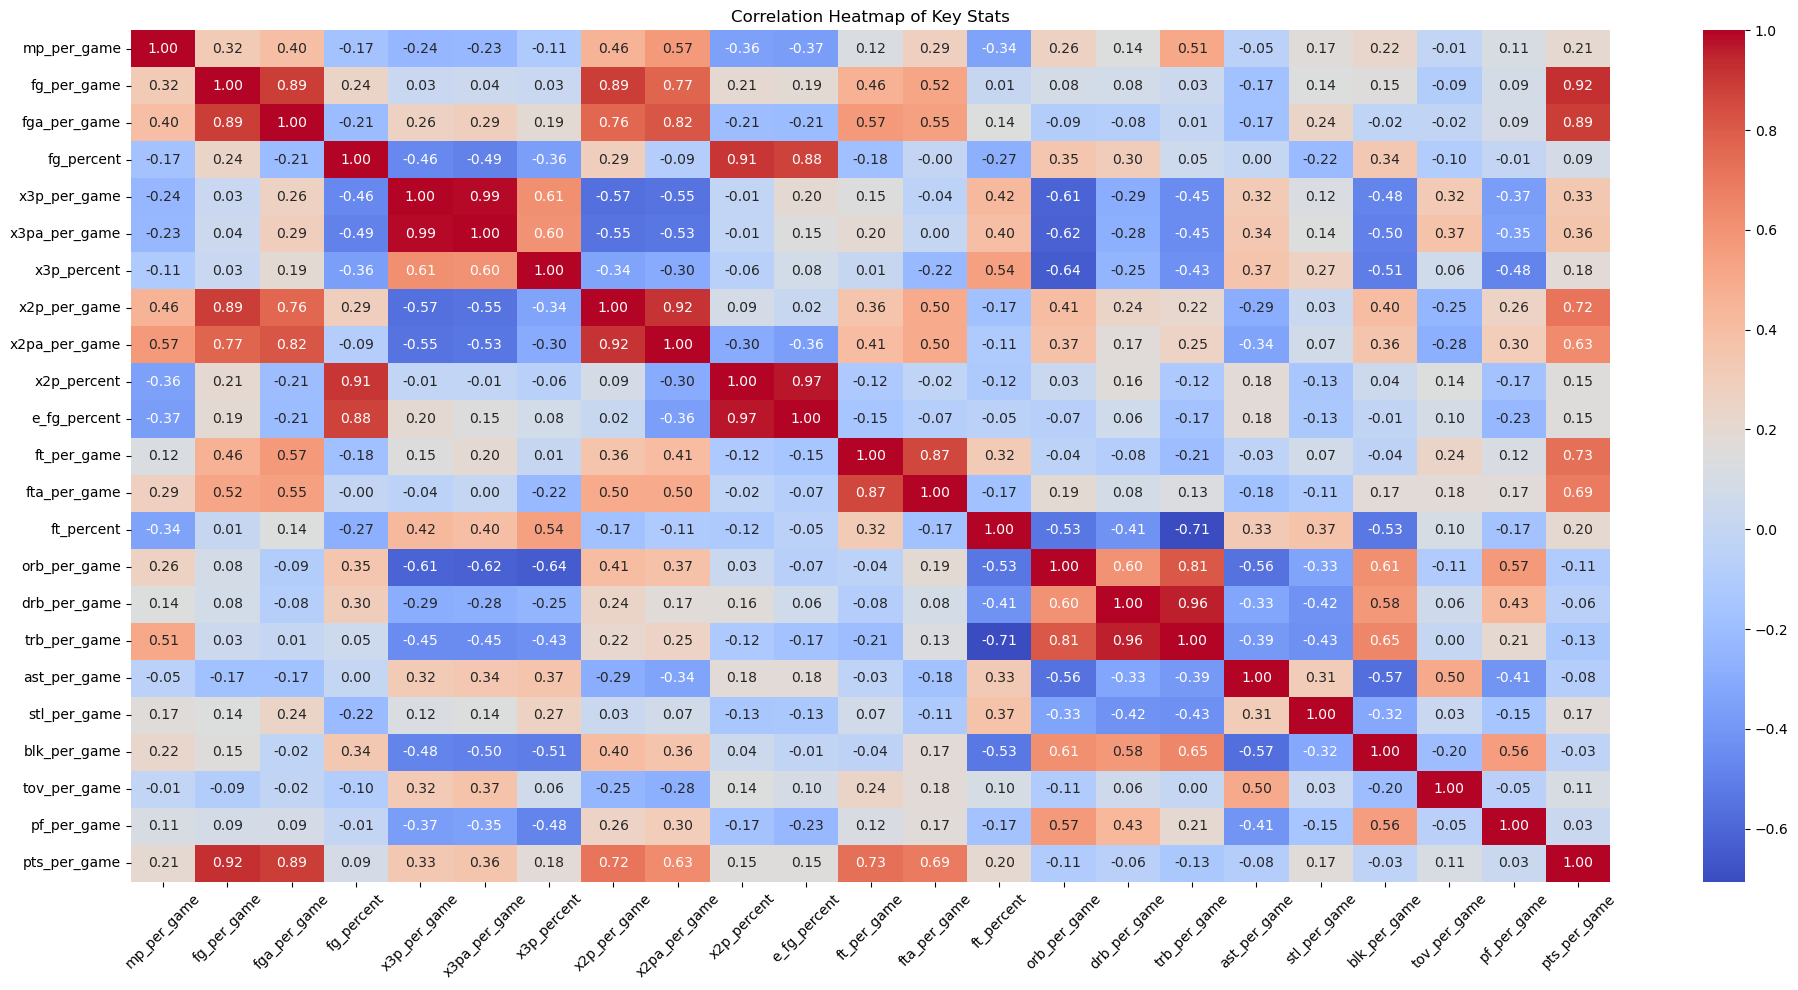

In [349]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45)
plt.title('Correlation Heatmap of Key Stats')
plt.tight_layout()
plt.show()